In [1]:
# NOTEBOOK OVERVIEW
# Limits the job postings dataset to those most similar
# to the user's resume allowing:
# - faster k-means processing in the following notebook
# - less individual jobs postings to sift through from the
#   perspective of a job seeker
# 
# However doing so will almost certainly change the sample
# from a statistical point of view. That is, make it less
# representative of the original population, and more
# representative of a different population similar to the
# sample which was truncated non-arbitrarily. 

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
import numpy as np
from matplotlib  import pyplot
%matplotlib inline


In [3]:
# load user resume and dataset

resume = open('data/Liveproject Resume.txt')
resume_dict  = {'title':'resume', 'body':resume.read(), 'bullets':''}
resume.close()
jobs_df = pd.read_pickle('data/jobs_df.pkl', 'zip')
dataset_df = jobs_df.append(pd.DataFrame(resume_dict, index=[0]))


In [4]:
# begin using NLP techniques:
# - use tf-idf as embedding: transform resume and dataset into tf-idf vectors
# - from below, TfidfVectorizer will default to a unigram for the n-gram
#   parameter: i.e, it will only match on single words 
 
# use content of job posting webpages as corpus to derive vocabulary
corpus = dataset_df['body']
vocab = TfidfVectorizer(stop_words='english')
freq_matrix = vocab.fit_transform(corpus)

resume_vec = freq_matrix[-1, :]
jobs_vec = freq_matrix[:-1, :]
print('resume vector dimensions: {}'.format(resume_vec.shape))
print('jobs vector dimensions: {}'.format(jobs_vec.shape))


resume vector dimensions: (1, 10011)
jobs vector dimensions: (492, 10011)


In [5]:
# see how similar resume is to the rest of dataset

cos_sims = cosine_similarity(jobs_vec, resume_vec)
cos_sims.shape

(492, 1)

In [6]:
# check some elements for expected results

for i in range(4):
    print(cos_sims[i][0], end='    ');

0.040947147438362044    0.04310242418954922    0.01670158213498872    0.023889020088984973    

In [7]:

jobs_df['cosine_similarity'] = cos_sims
sorted_jobs_df = jobs_df.sort_values(by='cosine_similarity', ascending=False)
sorted_jobs_df.reset_index(inplace=True, drop=True)
sorted_jobs_df.head()

,title,body,bullets,cosine_similarity
0,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.158476
1,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,(),0.093225
2,Data Science Summer Institute Student Intern -...,Data Science Summer Institute Student Intern -...,"(Students will work with scientists, engineers...",0.086933
3,"Senior Data Scientist, Education - Redwood Cit...","Senior Data Scientist, Education - Redwood Cit...","(Leverage data to understand product, identify...",0.084046
4,Bioinformatics Associate Data Scientist - San ...,Bioinformatics Associate Data Scientist - San ...,(Work on designing and implementing a framewor...,0.076612


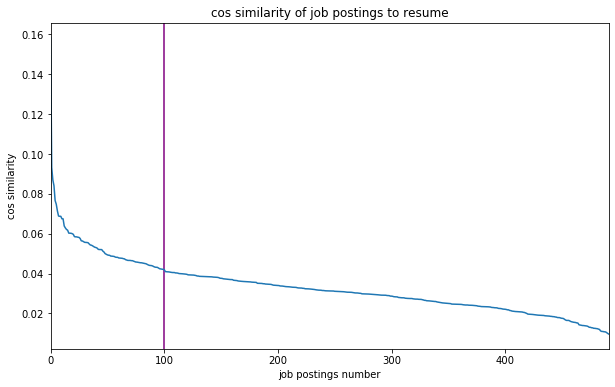

In [8]:

pyplot.figure(figsize=(10, 6))
pyplot.title('cos similarity of job postings to resume')
pyplot.xlabel('job postings number')
pyplot.ylabel('cos similarity');
pyplot.axvline(x=100, color='purple')

sorted_jobs_df['cosine_similarity'].plot();

In [9]:
# intuiting from chart's slope: save the first 100 most similar job postings

pd.DataFrame(sorted_jobs_df[:100]).to_pickle('data/sorted_trunc_jobs_df.pkl', 'zip')